<a href="https://colab.research.google.com/github/JasmineVan/MassiveDataProcessing_Final_Project/blob/main/2223_HK1_MMDS_CK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án cuối kỳ
# Môn: Xử lý dữ liệu lớn
# Học kỳ 1 - Năm học 2022-2023
# Giảng viên: Th.S. Nguyễn Thành An
# Sinh viên:
\begin{array}{ |c|c|c| }
ID&Student&MSSV\\
1&Trinh Van Thuong&51800128\\
2&Tran Thi Thang&51800625\\
\end{array}

# Cài đặt PySpark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# !cp drive/MyDrive/tmp/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Thuong's Data path
# When you run your own .ipynb file please ignore this cell
OXFORD_PET3_TEST = "/content/drive/MyDrive/Learn-TDTU/BDP/Final/datasets/oxford_pet3_test.csv"
OXFORD_PET3_TRAIN = "/content/drive/MyDrive/Learn-TDTU/BDP/Final/datasets/oxford_pet3_train.csv"
RATINGS2K = "/content/drive/MyDrive/Learn-TDTU/BDP/Final/datasets/ratings2k.csv"
STOCK_HVN2022 = "/content/drive/MyDrive/Learn-TDTU/BDP/Final/datasets/stockHVN2022.csv"

In [ ]:
# Your Data path
'''
OXFORD_PET3_TEST = ""
OXFORD_PET3_TRAIN = ""
RATINGS2K = ""
STOCK_HVN2022 = ""
'''

'\nOXFORD_PET3_TEST = ""\nOXFORD_PET3_TRAIN = ""\nRATINGS2K = ""\nSTOCK_HVN2022 = ""\n'

# Yêu cầu

## Spark Context

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
import numpy as np
import matplotlib.pyplot as plt

sc = SparkContext("local", 'CK')
sqlc = SQLContext(sc)

## Câu 1: Giảm số chiều với SVD

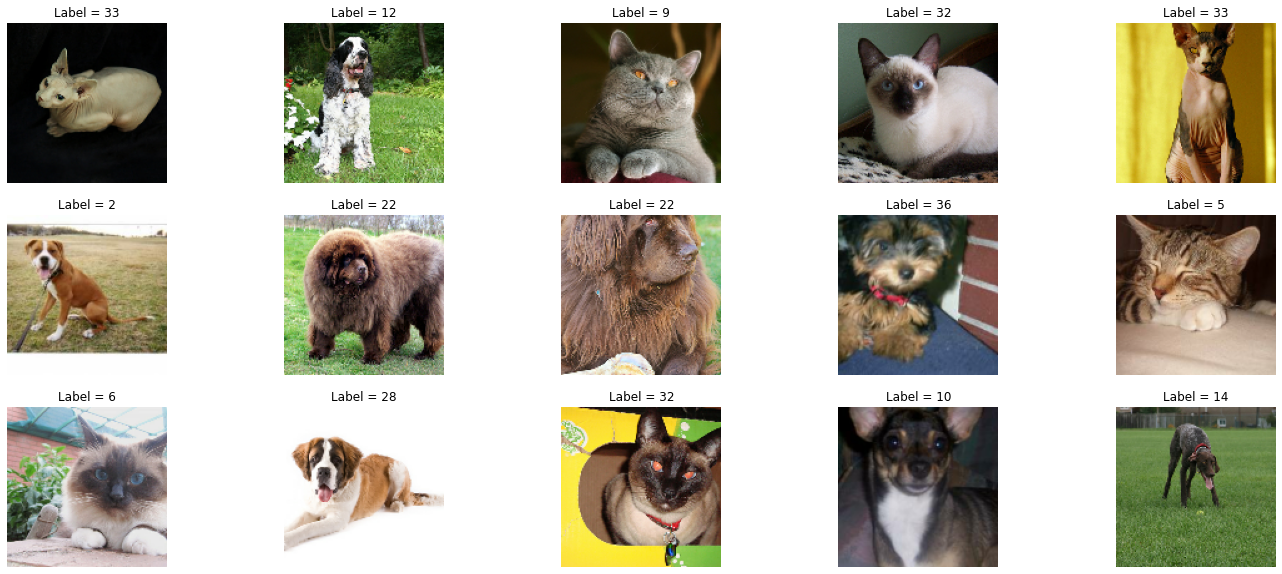

In [ ]:
rdd = sc.textFile(OXFORD_PET3_TRAIN)

def get_rows(row):
  return row.split(",")

rdd_sub = rdd.map(lambda row: get_rows(row))


list_pet_vector = rdd_sub.collect()


fig = plt.figure(figsize=(24, 10))

rows = 3
columns = 5
count_index = 1

for pet_image_vector in list_pet_vector[:15]:

  pet_image = pet_image_vector[2:]
  pet_image = np.reshape(np.array(pet_image, dtype=int), (128, 128, 3))

  fig.add_subplot(rows, columns, count_index)
  plt.imshow(pet_image)
  plt.axis('off')
  plt.title("Label = " + pet_image_vector[1])#label

  count_index += 1

In [ ]:
# ii. Reduce dimension - Train set

In [ ]:
rdd = sc.textFile(OXFORD_PET3_TRAIN)

def get_rows(row):
  return row.split(",")

rdd_sub = rdd.map(lambda row: get_rows(row))
list_pet_vector_train = rdd_sub.collect()

In [ ]:
import numpy as np
from scipy.linalg import svd

#Chọn số chiều r
r = 10000

list_index_label = [i[:2] for i in list_pet_vector_train] #giữ nguyên cột index và label
list_pet_image_vector = [i[2:r+2] for i in list_pet_vector_train]#lấy vector ảnh

#U S V_T
U,S,V_T = svd( np.asmatrix( list_pet_image_vector, dtype=int ), full_matrices=False)
S = np.diag(S)


list_pet_image_vector_matrix_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :r]
list_pet_image_vector_matrix_approx

array([[  5.,   3.,   3., ...,   8.,   7.,   4.],
       [  6.,  17.,   1., ...,  31.,  12.,  23.],
       [ 33.,  25.,   3., ...,  27.,   2.,  36.],
       ...,
       [253., 253., 253., ..., 198., 184., 200.],
       [ 76.,  56.,  50., ..., 108., 105., 137.],
       [ 87.,  87.,  78., ..., 196., 201., 198.]])

In [ ]:
train_data_array = np.concatenate( (np.asarray(list_index_label, dtype=int), list_pet_image_vector_matrix_approx), axis=1)

In [ ]:
import pandas as pd

df = pd.DataFrame(train_data_array[1:], columns = [float(i) for i in train_data_array[0]])
df.to_csv('oxford_pet3_train_'+str(r)+'.csv')

In [ ]:
# iii. Reduce dimension - Test set

In [ ]:
rdd = sc.textFile(OXFORD_PET3_TEST)

def get_rows(row):
  return row.split(",")

rdd_sub = rdd.map(lambda row: get_rows(row))
list_pet_vector_test = rdd_sub.collect()

In [ ]:
list_index_label = [i[:2] for i in list_pet_vector_test] #giữ nguyên cột index và label
list_pet_image_vector = [i[2:r+2] for i in list_pet_vector_test]#lấy vector ảnh

#U S V_T
U,S,V_T = svd( np.asmatrix( list_pet_image_vector, dtype=int ), full_matrices=False)
S = np.diag(S)


list_pet_image_vector_matrix_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :r]
list_pet_image_vector_matrix_approx

array([[ 2.54000000e+02,  2.46000000e+02,  2.35000000e+02, ...,
         1.34000000e+02,  4.40000000e+01,  1.21000000e+02],
       [ 3.00000000e+00,  3.00000000e+00,  1.00000000e+00, ...,
         3.00000000e+01,  3.20000000e+01,  2.10000000e+01],
       [ 1.15000000e+02,  1.28000000e+02,  3.20000000e+01, ...,
         9.20000000e+01, -3.72146758e-13,  5.60000000e+01],
       ...,
       [ 2.10000000e+01,  6.80000000e+01,  9.00000000e+00, ...,
         1.26000000e+02,  4.30000000e+01,  1.50000000e+02],
       [ 3.00000000e+00,  6.00000000e+00,  4.08562073e-14, ...,
         1.40000000e+01,  8.00000000e+00,  1.10000000e+01],
       [ 4.00000000e+00,  7.00000000e+00, -5.06261699e-13, ...,
         5.30000000e+01,  4.40000000e+01,  1.00000000e+00]])

In [ ]:
test_data_array = np.concatenate( (np.asarray(list_index_label, dtype=int), list_pet_image_vector_matrix_approx), axis=1)

In [ ]:
df = pd.DataFrame(train_data_array[1:], columns = [float(i) for i in train_data_array[0]])
df.to_csv('oxford_pet3_test_'+str(r)+'.csv')

## Câu 2: Khuyến nghị sản phẩm với Collaborative Filtering

In [ ]:
ratings_2k_df = sqlc.read.csv(RATINGS2K, header='true')

In [ ]:
from pyspark.sql.types import IntegerType, DoubleType, DateType, StructType, StructField, StringType
# Cast type int, float
ratings_2k_df = ratings_2k_df.withColumn("user", ratings_2k_df["user"].cast(IntegerType()))
ratings_2k_df = ratings_2k_df.withColumn("item", ratings_2k_df["item"].cast(IntegerType()))
ratings_2k_df = ratings_2k_df.withColumn("rating", ratings_2k_df["rating"].cast(DoubleType()))
# Info and check distinct
ratings_2k_df = ratings_2k_df.distinct()
ratings_2k_df = ratings_2k_df.filter(ratings_2k_df.rating != np.nan)
ratings_2k_df.printSchema()
ratings_2k_df.describe().show()
# Sorting
ratings_2k_df = ratings_2k_df.sort("user")
ratings_2k_df.show()

root
 |-- index: string (nullable = true)
 |-- user: integer (nullable = true)
 |-- item: integer (nullable = true)
 |-- rating: double (nullable = true)

+-------+-----------------+------------------+------------------+------------------+
|summary|            index|              user|              item|            rating|
+-------+-----------------+------------------+------------------+------------------+
|  count|             2365|              2365|              2365|              2365|
|   mean|           1182.0|38.002536997885834|221.79957716701904| 3.641860465116279|
| stddev|682.8610156295838|23.501160866834603|130.38801426427403|1.0067781732668077|
|    min|                0|                 1|                 0|               0.5|
|    max|              999|                75|               466|               5.0|
+-------+-----------------+------------------+------------------+------------------+

+-----+----+----+------+
|index|user|item|rating|
+-----+----+----+------+
| 11

In [ ]:
# first 70 users rating - train set
ratings_2k_first_70_users_df = ratings_2k_df.filter(ratings_2k_df.user <= 70)
# ratings_2k_first_70_users_df.describe().show()
ratings_2k_first_70_users_df.show()

+-----+----+----+------+
|index|user|item|rating|
+-----+----+----+------+
| 1544|   1| 163|   5.0|
|   32|   1| 167|   3.5|
| 1188|   1| 168|   5.0|
|  390|   1| 352|   5.0|
|  130|   1| 422|   3.5|
|  482|   2| 251|   5.0|
| 1568|   2| 216|   1.0|
| 2285|   2| 321|   4.0|
|   50|   2| 413|   3.5|
| 2110|   2| 193|   4.5|
| 1791|   2| 373|   4.5|
| 1743|   2| 348|   3.0|
|  674|   2| 288|   5.0|
| 1949|   2| 148|   1.0|
|  238|   2| 434|   4.0|
| 2229|   2| 144|   5.0|
| 2315|   2|  42|   0.5|
| 1108|   2| 310|   2.0|
| 1399|   2| 320|   2.0|
| 2274|   2| 456|   4.5|
+-----+----+----+------+
only showing top 20 rows



In [ ]:
(training, test) = ratings_2k_first_70_users_df.randomSplit([0.9, 0.1])

In [ ]:
# last 4 users rating - validate set
ratings_2k_last_4_users_df = ratings_2k_df.filter(ratings_2k_df.user > 70)
# ratings_2k_last_4_users_df.describe().show()
ratings_2k_last_4_users_df.show()

+-----+----+----+------+
|index|user|item|rating|
+-----+----+----+------+
| 1849|  71| 288|   5.0|
|  463|  71| 251|   5.0|
| 2183|  71|  36|   5.0|
| 1324|  71| 144|   5.0|
|  273|  71| 216|   5.0|
| 1007|  71|  81|   5.0|
| 1240|  71| 176|   5.0|
|  692|  71|  67|   5.0|
| 1619|  71| 199|   5.0|
| 2202|  71| 322|   5.0|
|  507|  71| 262|   5.0|
| 1039|  72| 103|   1.0|
| 1413|  72| 464|   5.0|
| 1471|  72| 165|   1.0|
| 2271|  72| 101|   2.0|
|    4|  72| 284|   3.0|
| 2304|  72|  17|   4.0|
| 1263|  72|  42|   4.0|
| 2050|  72| 267|   4.0|
|  544|  72| 110|   2.0|
+-----+----+----+------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

als = ALS(maxIter=5,
          userCol="user", 
          itemCol="item", 
          ratingCol="rating",
          coldStartStrategy="drop",
          nonnegative=True)
model = als.fit(training)

In [ ]:
# Test the model
pred = model.transform(test)
pred.show()

+-----+----+----+------+----------+
|index|user|item|rating|prediction|
+-----+----+----+------+----------+
| 1949|   2| 148|   1.0|  3.524374|
|  626|   9| 463|   3.0|  3.897243|
| 1820|  19|  31|   2.0| 2.3361776|
|  615|  67|  31|   1.0| 2.1795774|
|  327|  31| 251|   3.5|  2.628619|
|  491|   5| 251|   5.0| 3.8503296|
| 2232|  49| 251|   5.0|  5.050335|
| 1214|  36| 251|   4.0| 3.9249737|
|  444|  13|  65|   4.0| 3.5746343|
|  994|  48|  65|   5.0| 4.6857834|
| 2148|   5|  65|   4.0| 3.6055393|
| 2289|  46| 458|   4.5| 4.0867205|
| 1418|  31| 155|   2.5| 1.9050381|
|  968|  18| 193|   4.0| 2.7469542|
| 1724|  36| 193|   3.0|  3.449823|
| 1881|  31|  81|   3.0| 2.5069396|
| 2320|   7|  81|   4.0|   3.84743|
|  864|  45|  81|   4.0| 3.8502274|
| 2235|  36|  81|   5.0| 4.1642766|
|  545|  57| 385|   4.0|  4.560458|
+-----+----+----+------+----------+
only showing top 20 rows



In [ ]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(pred)
print("RMSE = " + str(rmse))

RMSE = 1.0958386797483721


In [ ]:
# Convert pyspark df to pandas df - whole dataset
pandasDF = ratings_2k_df.toPandas()
print(pandasDF)

     index  user  item  rating
0     1544     1   163     5.0
1      390     1   352     5.0
2       32     1   167     3.5
3     1188     1   168     5.0
4      130     1   422     3.5
...    ...   ...   ...     ...
2360   270    75    36     4.0
2361  1260    75   214     4.0
2362   332    75    67     3.0
2363  1618    75   277     3.5
2364  1926    75   161     3.5

[2365 rows x 4 columns]


In [ ]:
# Create user-item matrix
user_item_matrix = pandasDF.pivot_table(index='user', columns='item', values='rating')

In [ ]:
user_item_matrix.head()

item,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Nomalize user-item matrix
user_item_matrix_nomalized = user_item_matrix.subtract(user_item_matrix.mean(axis=1), axis = 'rows')

In [ ]:
user_item_matrix_nomalized.head()

item,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.086207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.277778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.297297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# User similarity matrix using Pearson correlation
user_similarity = user_item_matrix_nomalized.T.corr()

In [ ]:
# Remove last 4 user
user_similarity.drop(index=71, inplace=True)
user_similarity.drop(index=72, inplace=True)
user_similarity.drop(index=73, inplace=True)
user_similarity.drop(index=74, inplace=True)
user_similarity.head()

user,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
user,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.000000,0.580756,0.327327,0.613241,NaN,0.000000,-0.019270,-0.373611,0.595318,...,0.094384,0.055048,NaN,6.678627e-01,-0.008671,NaN,0.344169,0.064775,-0.223607,0.135892
3,NaN,0.580756,1.000000,0.815867,0.353553,-0.145865,-0.500000,0.453212,-0.237459,0.426641,...,NaN,-0.527046,NaN,2.472286e-01,0.588989,NaN,0.105616,0.775217,0.688247,0.135731
4,NaN,0.327327,0.815867,1.000000,0.292770,-1.000000,NaN,0.836490,0.000000,0.777429,...,NaN,0.292770,NaN,6.347454e-01,0.896653,NaN,-0.162822,0.928571,NaN,-0.049029
5,NaN,0.613241,0.353553,0.292770,1.000000,-0.500000,0.243332,0.143972,0.625000,0.577458,...,-0.449078,0.509427,NaN,-2.889523e-17,0.427391,NaN,0.122803,0.311689,0.041021,0.034185


In [ ]:
# 4 users need to be calculate rating 71, 71, 73, 74
USER1 = ratings_2k_df.filter(ratings_2k_df.user == 71).select(['item', 'rating'])
USER2 = ratings_2k_df.filter(ratings_2k_df.user == 72).select(['item', 'rating'])
USER3 = ratings_2k_df.filter(ratings_2k_df.user == 73).select(['item', 'rating'])
USER4 = ratings_2k_df.filter(ratings_2k_df.user == 74).select(['item', 'rating'])
USER2.show()

+----+------+
|item|rating|
+----+------+
| 437|   5.0|
| 403|   3.0|
| 175|   1.0|
|  42|   4.0|
| 110|   2.0|
| 453|   4.0|
| 444|   3.0|
| 438|   5.0|
|  34|   4.0|
| 101|   2.0|
| 464|   5.0|
| 103|   1.0|
| 307|   3.0|
| 267|   4.0|
| 284|   3.0|
| 233|   2.0|
|  17|   4.0|
| 251|   5.0|
| 165|   1.0|
| 275|   3.0|
+----+------+
only showing top 20 rows



In [ ]:
def FindSimilarUsersByIndex(index ,threshold):
  '''
  Function Objective: Is used to find 10 similar users to current user
  '''
  n = 10
  similar_users = user_similarity[user_similarity[index] > threshold][index].sort_values(ascending=False)[:n]
  return similar_users

User 1: Has no similar user

In [ ]:
user1 = 71
print(FindSimilarUsersByIndex(user1, 0.3))

Series([], Name: 71, dtype: float64)


User 2: 

In [ ]:
user2 = 72
print(FindSimilarUsersByIndex(user2, 0.3))

user
64    0.971399
34    0.903696
29    0.866025
62    0.752140
42    0.727860
20    0.653516
69    0.563233
50    0.549535
37    0.547723
10    0.545494
Name: 72, dtype: float64


In [ ]:
user2_rating = user_item_matrix_nomalized[user_item_matrix_nomalized.index == user2].dropna(axis=1, how='all')
user2_rating

item,1,4,5,8,10,11,12,15,17,18,...,451,452,453,454,456,457,460,462,464,466
user,,,,,,,,,,,,,,,,,,,,,
72,-1.367647,0.632353,0.632353,1.632353,0.632353,1.632353,0.632353,1.632353,0.632353,0.632353,...,0.632353,0.632353,0.632353,1.632353,1.632353,0.632353,-0.367647,0.632353,1.632353,-2.367647


In [ ]:
# Calculate average rating
avg_rating = user_item_matrix[user_item_matrix.index == user2].T.mean()[user2]
print(avg_rating)

3.3676470588235294


In [ ]:
user2_rating = user2_rating + avg_rating
user2_rating

item,1,4,5,8,10,11,12,15,17,18,...,451,452,453,454,456,457,460,462,464,466
user,,,,,,,,,,,,,,,,,,,,,
72,2.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,5.0,1.0


User 3:

In [ ]:
user3 = 73
print(FindSimilarUsersByIndex(user3, 0.3))

user
29    1.000000
64    1.000000
70    0.958706
67    0.944911
4     0.928571
61    0.904534
15    0.870388
13    0.801235
3     0.775217
47    0.758900
Name: 73, dtype: float64


In [ ]:
user3_rating = user_item_matrix_nomalized[user_item_matrix_nomalized.index == user3].dropna(axis=1, how='all')
user3_rating

item,0,4,9,12,18,25,28,41,42,48,...,374,382,383,385,386,394,397,408,412,417
user,,,,,,,,,,,,,,,,,,,,,
73,-0.555556,1.444444,0.444444,-0.555556,0.444444,1.444444,1.444444,-1.555556,0.444444,-0.555556,...,-0.555556,-2.555556,1.444444,1.444444,-1.555556,-0.555556,-0.555556,-0.555556,-0.555556,-0.555556


In [ ]:
# Calculate average rating
avg_rating = user_item_matrix[user_item_matrix.index == user3].T.mean()[user3]
print(avg_rating)

3.5555555555555554


In [ ]:
user3_rating = user3_rating + avg_rating
user3_rating

item,0,4,9,12,18,25,28,41,42,48,...,374,382,383,385,386,394,397,408,412,417
user,,,,,,,,,,,,,,,,,,,,,
73,3.0,5.0,4.0,3.0,4.0,5.0,5.0,2.0,4.0,3.0,...,3.0,1.0,5.0,5.0,2.0,3.0,3.0,3.0,3.0,3.0


User 4:

In [ ]:
user4 = 74
print(FindSimilarUsersByIndex(user4, 0.3))

user
46    1.000000
62    1.000000
27    0.755929
48    0.755929
3     0.688247
67    0.639362
69    0.638109
50    0.634981
8     0.614940
64    0.555556
Name: 74, dtype: float64


In [ ]:
user4_rating = user_item_matrix_nomalized[user_item_matrix_nomalized.index == user4].dropna(axis=1, how='all')
user4_rating

item,7,81,83,89,93,115,128,161,163,176,...,193,199,216,236,251,262,320,322,323,326
user,,,,,,,,,,,,,,,,,,,,,
74,-0.227273,-2.227273,-1.227273,-0.227273,1.772727,-0.227273,1.772727,-0.227273,0.772727,-0.227273,...,-2.227273,0.772727,-0.227273,-0.227273,0.772727,-0.227273,1.772727,-0.227273,-0.227273,-0.227273


In [ ]:
# Calculate average rating
avg_rating = user_item_matrix[user_item_matrix.index == user4].T.mean()[user4]
print(avg_rating)

3.227272727272727


In [ ]:
user4_rating = user4_rating + avg_rating
user4_rating

item,7,81,83,89,93,115,128,161,163,176,...,193,199,216,236,251,262,320,322,323,326
user,,,,,,,,,,,,,,,,,,,,,
74,3.0,1.0,2.0,3.0,5.0,3.0,5.0,3.0,4.0,3.0,...,1.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0


## Câu 3: Dự đoán giá chứng khoán

In [ ]:
stock_hvn_df = sqlc.read.csv(STOCK_HVN2022, header='true')

In [ ]:
stock_hvn_df.printSchema()
stock_hvn_df.show()

root
 |-- Ngay: string (nullable = true)
 |-- HVN: string (nullable = true)

+----------+-----+
|      Ngay|  HVN|
+----------+-----+
|18/11/2022| 9.30|
|17/11/2022| 9.42|
|16/11/2022| 9.21|
|15/11/2022| 8.61|
|14/11/2022| 9.25|
|11/11/2022| 9.90|
|10/11/2022| 9.76|
|09/11/2022|10.40|
|08/11/2022|10.25|
|07/11/2022|10.10|
|04/11/2022|10.70|
|03/11/2022|10.85|
|02/11/2022|10.90|
|01/11/2022|10.90|
|31/10/2022|10.80|
|28/10/2022|10.75|
|27/10/2022|10.85|
|26/10/2022|10.55|
|25/10/2022|10.55|
|24/10/2022|10.55|
+----------+-----+
only showing top 20 rows



In [ ]:
stock_hvn_list = stock_hvn_df.collect()
training_list = []
test_list = []

# Split to train and test set
for row in stock_hvn_list:
  if int(row[0].split("/")[1]) < 9:
    training_list.append(row)
  else:
    test_list.append(row)

In [ ]:
print(training_list)
print(test_list)

[Row(Ngay='31/08/2022', HVN='17.25'), Row(Ngay='30/08/2022', HVN='17.10'), Row(Ngay='29/08/2022', HVN='17.05'), Row(Ngay='26/08/2022', HVN='17.65'), Row(Ngay='25/08/2022', HVN='17.90'), Row(Ngay='24/08/2022', HVN='17.90'), Row(Ngay='23/08/2022', HVN='17.45'), Row(Ngay='22/08/2022', HVN='17.40'), Row(Ngay='19/08/2022', HVN='17.40'), Row(Ngay='18/08/2022', HVN='17.35'), Row(Ngay='17/08/2022', HVN='17.35'), Row(Ngay='16/08/2022', HVN='17.70'), Row(Ngay='15/08/2022', HVN='17.65'), Row(Ngay='12/08/2022', HVN='17.85'), Row(Ngay='11/08/2022', HVN='17.80'), Row(Ngay='10/08/2022', HVN='18.10'), Row(Ngay='09/08/2022', HVN='17.55'), Row(Ngay='08/08/2022', HVN='17.60'), Row(Ngay='05/08/2022', HVN='17.80'), Row(Ngay='04/08/2022', HVN='17.10'), Row(Ngay='03/08/2022', HVN='17.05'), Row(Ngay='02/08/2022', HVN='16.95'), Row(Ngay='01/08/2022', HVN='16.95'), Row(Ngay='29/07/2022', HVN='16.50'), Row(Ngay='28/07/2022', HVN='16.10'), Row(Ngay='27/07/2022', HVN='15.95'), Row(Ngay='26/07/2022', HVN='16.20'), 

In [ ]:
# Creates Empty RDD
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('CK').getOrCreate()

emptyRDD = spark.sparkContext.emptyRDD()
schema = StructType([
  StructField('5_prev_days', StringType(), True),
  StructField('5_prev_days_price', StringType(), True),
  StructField('today', DoubleType(), True)
])

In [ ]:
# Create new Dataframe with empty RDD
stock_hvn_training_df = spark.createDataFrame(emptyRDD,schema)
stock_hvn_test_df = spark.createDataFrame(emptyRDD,schema)
stock_hvn_training_df.printSchema()

root
 |-- 5_prev_days: string (nullable = true)
 |-- 5_prev_days_price: string (nullable = true)
 |-- today: double (nullable = true)



In [ ]:
# Traing set processing
columns = ['5_prev_days', '5_prev_days_price', 'today']

def fill_5_prev_days_price(df, columns, source_list):
  '''
  Function Objective: Is used to fill 5 previous days's price in 1 cell
  '''
  for i in range(0, len(source_list)-6):
    append_date = append_price = today = temp = []
    # date
    append_date = \
    source_list[i][0]+","+\
    source_list[i+1][0]+","+\
    source_list[i+2][0]+","+\
    source_list[i+3][0]+","+\
    source_list[i+4][0]
    # price
    append_price = \
    source_list[i][1]+","+\
    source_list[i+1][1]+","+\
    source_list[i+2][1]+","+\
    source_list[i+3][1]+","+\
    source_list[i+4][1]
    # real price
    today = source_list[i+5][1]
    temp.append(append_date)
    temp.append(append_price)
    temp.append(today)
    newRow = spark.createDataFrame([tuple(temp)], columns)
    df = df.union(newRow)
  return df

In [ ]:
stock_hvn_training_df = fill_5_prev_days_price(stock_hvn_training_df, columns, training_list)
stock_hvn_test_df = fill_5_prev_days_price(stock_hvn_test_df, columns, test_list)

In [ ]:
from pyspark.sql import functions as f
from pyspark.ml.functions import *

# Convert string to Vector
stock_hvn_training_df = stock_hvn_training_df.withColumn('5_prev_days_price', array_to_vector(f.split('5_prev_days_price', ',[ ]*').cast('array<double>')))
stock_hvn_test_df = stock_hvn_test_df.withColumn('5_prev_days_price', array_to_vector(f.split('5_prev_days_price', ',[ ]*').cast('array<double>')))
# Convert string to Double
stock_hvn_training_df = stock_hvn_training_df.withColumn("today",f.col("today").cast('double'))
stock_hvn_test_df = stock_hvn_test_df.withColumn("today",f.col("today").cast('double'))
# Rename
stock_hvn_training_df = stock_hvn_training_df.withColumnRenamed("5_prev_days_price","features")
stock_hvn_test_df = stock_hvn_test_df.withColumnRenamed("5_prev_days_price","features")

In [ ]:
stock_hvn_training_df.printSchema()
stock_hvn_training_df.show()

root
 |-- 5_prev_days: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- today: double (nullable = true)

+--------------------+--------------------+-----+
|         5_prev_days|            features|today|
+--------------------+--------------------+-----+
|31/08/2022,30/08/...|[17.25,17.1,17.05...| 17.9|
|30/08/2022,29/08/...|[17.1,17.05,17.65...|17.45|
|29/08/2022,26/08/...|[17.05,17.65,17.9...| 17.4|
|26/08/2022,25/08/...|[17.65,17.9,17.9,...| 17.4|
|25/08/2022,24/08/...|[17.9,17.9,17.45,...|17.35|
|24/08/2022,23/08/...|[17.9,17.45,17.4,...|17.35|
|23/08/2022,22/08/...|[17.45,17.4,17.4,...| 17.7|
|22/08/2022,19/08/...|[17.4,17.4,17.35,...|17.65|
|19/08/2022,18/08/...|[17.4,17.35,17.35...|17.85|
|18/08/2022,17/08/...|[17.35,17.35,17.7...| 17.8|
|17/08/2022,16/08/...|[17.35,17.7,17.65...| 18.1|
|16/08/2022,15/08/...|[17.7,17.65,17.85...|17.55|
|15/08/2022,12/08/...|[17.65,17.85,17.8...| 17.6|
|12/08/2022,11/08/...|[17.85,17.8,18.1,...| 17.8|
|11/08/2022,10/08/...|[1

In [ ]:
stock_hvn_test_df.printSchema()
stock_hvn_test_df.show()

root
 |-- 5_prev_days: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- today: double (nullable = true)

+--------------------+--------------------+-----+
|         5_prev_days|            features|today|
+--------------------+--------------------+-----+
|18/11/2022,17/11/...|[9.3,9.42,9.21,8....|  9.9|
|17/11/2022,16/11/...|[9.42,9.21,8.61,9...| 9.76|
|16/11/2022,15/11/...|[9.21,8.61,9.25,9...| 10.4|
|15/11/2022,14/11/...|[8.61,9.25,9.9,9....|10.25|
|14/11/2022,11/11/...|[9.25,9.9,9.76,10...| 10.1|
|11/11/2022,10/11/...|[9.9,9.76,10.4,10...| 10.7|
|10/11/2022,09/11/...|[9.76,10.4,10.25,...|10.85|
|09/11/2022,08/11/...|[10.4,10.25,10.1,...| 10.9|
|08/11/2022,07/11/...|[10.25,10.1,10.7,...| 10.9|
|07/11/2022,04/11/...|[10.1,10.7,10.85,...| 10.8|
|04/11/2022,03/11/...|[10.7,10.85,10.9,...|10.75|
|03/11/2022,02/11/...|[10.85,10.9,10.9,...|10.85|
|02/11/2022,01/11/...|[10.9,10.9,10.8,1...|10.55|
|01/11/2022,31/10/...|[10.9,10.8,10.75,...|10.55|
|31/10/2022,28/10/...|[1

In [ ]:
from pyspark.ml.regression import  LinearRegression
lg = LinearRegression(labelCol='today')

In [ ]:
lg_model = lg.fit(stock_hvn_training_df)

In [ ]:
import pandas as pd
pd.DataFrame({"Coefficients":lg_model.coefficients}, index=['day1', 'day2', 'day3', 'day4', 'day5'])

,Coefficients
day1,-0.172991
day2,0.161167
day3,0.111241
day4,-0.181695
day5,1.073804


In [ ]:
res = lg_model.evaluate(stock_hvn_test_df)

In [ ]:
res.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|  0.3949230657148082|
| -0.2054164380093706|
|  0.6921955852632351|
|-0.44972421697381293|
| -0.3008391702868458|
| 0.49679075594998956|
|-0.13542526393785614|
| 0.01409655463645798|
|-0.08085754791845545|
| -0.3111076326995885|
|-0.17966954021738069|
|-0.02625847745148...|
| -0.4229499893920252|
|-0.06096057646642...|
|-0.13583390009877938|
| 0.47277209456887626|
| 0.44413880054541366|
|0.010666127967853711|
|-0.21352655311324575|
|-0.39216890661860937|
+--------------------+
only showing top 20 rows



In [ ]:
# Prediction test data
predictions = lg_model.transform(stock_hvn_test_df.select('features'))

In [ ]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[9.3,9.42,9.21,8....| 9.505076934285192|
|[9.42,9.21,8.61,9...|  9.96541643800937|
|[9.21,8.61,9.25,9...| 9.707804414736765|
|[8.61,9.25,9.9,9....|10.699724216973813|
|[9.25,9.9,9.76,10...|10.400839170286845|
|[9.9,9.76,10.4,10...| 10.20320924405001|
|[9.76,10.4,10.25,...|10.985425263937856|
|[10.4,10.25,10.1,...|10.885903445363542|
|[10.25,10.1,10.7,...|10.980857547918456|
|[10.1,10.7,10.85,...| 11.11110763269959|
|[10.7,10.85,10.9,...| 10.92966954021738|
|[10.85,10.9,10.9,...|10.876258477451481|
|[10.9,10.9,10.8,1...|10.972949989392026|
|[10.9,10.8,10.75,...|10.610960576466427|
|[10.8,10.75,10.85...| 10.68583390009878|
|[10.75,10.85,10.5...|10.677227905431124|
|[10.85,10.55,10.5...|11.255861199454586|
|[10.55,10.55,10.5...|11.789333872032147|
|[10.55,10.55,11.1...|11.863526553113246|
|[10.55,11.15,11.7...|11.842168906618609|
+--------------------+------------

In [ ]:
# MSE
print(res.meanSquaredError)

0.1253077785859737


## Câu 4: Phân loại đa lớp với pyspark

Base Dataset

In [ ]:
# i. Training set
pet3_train_rdd = sc.textFile(OXFORD_PET3_TRAIN) 
pet3_train_df = pet3_train_rdd.map(lambda x: (x, )).toDF()

In [ ]:
pet3_train_df = pet3_train_df.withColumn('index', f.split(pet3_train_df['_1'], ',').getItem(0)) \
       .withColumn('label', f.split(pet3_train_df['_1'], ',').getItem(1))

In [ ]:
pet3_train_df = pet3_train_df.select(f.split(col("_1"),",").alias("features"), 'index', 'label') \
    .drop("_1")

In [ ]:
pet3_train_df.printSchema()
pet3_train_df.show(15)

root
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- index: string (nullable = true)
 |-- label: string (nullable = true)

+--------------------+-----+-----+
|            features|index|label|
+--------------------+-----+-----+
|[0, 33, 5, 3, 3, ...|    0|   33|
|[1, 12, 6, 17, 1,...|    1|   12|
|[2, 9, 33, 25, 3,...|    2|    9|
|[3, 32, 89, 110, ...|    3|   32|
|[4, 33, 235, 227,...|    4|   33|
|[5, 2, 254, 254, ...|    5|    2|
|[6, 22, 174, 183,...|    6|   22|
|[7, 22, 198, 166,...|    7|   22|
|[8, 36, 56, 80, 6...|    8|   36|
|[9, 5, 52, 30, 22...|    9|    5|
|[10, 6, 244, 196,...|   10|    6|
|[11, 28, 255, 255...|   11|   28|
|[12, 32, 244, 206...|   12|   32|
|[13, 10, 1, 0, 0,...|   13|   10|
|[14, 14, 139, 121...|   14|   14|
+--------------------+-----+-----+
only showing top 15 rows



In [ ]:
# Remove index and label from image
pet3_train_df = pet3_train_df.withColumn("features", f.expr("slice(features, 3, SIZE(features))"))

In [ ]:
pet3_train_df.printSchema()
pet3_train_df.show(15)

root
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- index: string (nullable = true)
 |-- label: string (nullable = true)

+--------------------+-----+-----+
|            features|index|label|
+--------------------+-----+-----+
|[5, 3, 3, 5, 4, 3...|    0|   33|
|[6, 17, 1, 8, 16,...|    1|   12|
|[33, 25, 3, 33, 2...|    2|    9|
|[89, 110, 101, 10...|    3|   32|
|[235, 227, 95, 23...|    4|   33|
|[254, 254, 252, 2...|    5|    2|
|[174, 183, 180, 1...|    6|   22|
|[198, 166, 137, 1...|    7|   22|
|[56, 80, 65, 49, ...|    8|   36|
|[52, 30, 22, 57, ...|    9|    5|
|[244, 196, 200, 2...|   10|    6|
|[255, 255, 255, 2...|   11|   28|
|[244, 206, 43, 24...|   12|   32|
|[1, 0, 0, 0, 0, 0...|   13|   10|
|[139, 121, 109, 1...|   14|   14|
+--------------------+-----+-----+
only showing top 15 rows



In [ ]:
# Cast type of each column
pet3_train_df = pet3_train_df.withColumn("features", pet3_train_df.features.cast("array<int>"))\
  .withColumn("index", pet3_train_df["index"].cast(IntegerType()))\
  .withColumn("label", pet3_train_df["label"].cast(DoubleType()))

In [ ]:
pet3_train_df = pet3_train_df.withColumn("features", array_to_vector("features"))

In [ ]:
# Done prepare data
pet3_train_df.printSchema()
pet3_train_df.show(15)

root
 |-- features: vector (nullable = true)
 |-- index: integer (nullable = true)
 |-- label: double (nullable = true)

+--------------------+-----+-----+
|            features|index|label|
+--------------------+-----+-----+
|[5.0,3.0,3.0,5.0,...|    0| 33.0|
|[6.0,17.0,1.0,8.0...|    1| 12.0|
|[33.0,25.0,3.0,33...|    2|  9.0|
|[89.0,110.0,101.0...|    3| 32.0|
|[235.0,227.0,95.0...|    4| 33.0|
|[254.0,254.0,252....|    5|  2.0|
|[174.0,183.0,180....|    6| 22.0|
|[198.0,166.0,137....|    7| 22.0|
|[56.0,80.0,65.0,4...|    8| 36.0|
|[52.0,30.0,22.0,5...|    9|  5.0|
|[244.0,196.0,200....|   10|  6.0|
|[255.0,255.0,255....|   11| 28.0|
|[244.0,206.0,43.0...|   12| 32.0|
|[1.0,0.0,0.0,0.0,...|   13| 10.0|
|[139.0,121.0,109....|   14| 14.0|
+--------------------+-----+-----+
only showing top 15 rows



In [ ]:
# Function to Pre-processing data 
def data_pre_processing(SOURCE_DATA_PATH):
  '''
  Function Objective: Is used to pre-processing input data of classification model
  - split data to 3 columns: image, index, label
  - remove 2 first elements in image
  - cast type image to vector, index and label to int
  '''
  rdd = sc.textFile(SOURCE_DATA_PATH) 
  df = rdd.map(lambda x: (x, )).toDF()
  df = df.withColumn('index', f.split(df['_1'], ',').getItem(0)) \
    .withColumn('label', f.split(df['_1'], ',').getItem(1))
  df = df.select(f.split(f.col("_1"),",").alias("features"), 'index', 'label') \
    .drop("_1")
  # Remove index and label from image
  df = df.withColumn("features", f.expr("slice(features, 3, SIZE(features))"))
  # Cast type of each column
  df = df.withColumn("features", df.features.cast("array<int>"))\
    .withColumn("index", df["index"].cast(IntegerType()))\
    .withColumn("label", df["label"].cast(DoubleType()))
  df = df.withColumn("features", array_to_vector("features"))
  return df

In [ ]:
# Test dataframe
pet3_test_df = data_pre_processing(OXFORD_PET3_TEST)

In [ ]:
pet3_test_df.printSchema()
pet3_test_df.describe().show()
pet3_test_df.show()

root
 |-- features: vector (nullable = true)
 |-- index: integer (nullable = true)
 |-- label: double (nullable = true)

+-------+-----------------+------------------+
|summary|            index|             label|
+-------+-----------------+------------------+
|  count|              500|               500|
|   mean|            249.5|            18.698|
| stddev|144.4818327679989|10.633199229380752|
|    min|                0|               0.0|
|    max|              499|              36.0|
+-------+-----------------+------------------+

+--------------------+-----+-----+
|            features|index|label|
+--------------------+-----+-----+
|[254.0,246.0,235....|    0| 19.0|
|[3.0,3.0,1.0,3.0,...|    1| 20.0|
|[115.0,128.0,32.0...|    2| 28.0|
|[182.0,152.0,116....|    3| 28.0|
|[187.0,191.0,202....|    4|  4.0|
|[86.0,80.0,66.0,7...|    5| 18.0|
|[153.0,70.0,86.0,...|    6| 22.0|
|[207.0,191.0,178....|    7| 36.0|
|[107.0,97.0,105.0...|    8| 18.0|
|[117.0,114.0,104....|    9| 16.0|


In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

layers = [49152, 4, 2, 500]
classifier = MultilayerPerceptronClassifier(labelCol='label',
                                            featuresCol='features',
                                            maxIter=100,
                                            layers=layers,
                                            blockSize=128,
                                            seed=1234)

In [ ]:
model = classifier.fit(pet3_train_df)

In [ ]:
prediction = model.transform(pet3_test_df)
predictionAndLabels = prediction.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

Test set accuracy = 0.014


In [ ]:
prediction.show()

+--------------------+-----+-----+--------------------+--------------------+----------+
|            features|index|label|       rawPrediction|         probability|prediction|
+--------------------+-----+-----+--------------------+--------------------+----------+
|[254.0,246.0,235....|    0| 19.0|[19.8746321247001...|[0.03389495139153...|       5.0|
|[3.0,3.0,1.0,3.0,...|    1| 20.0|[19.4458322180096...|[0.02650994701280...|       5.0|
|[115.0,128.0,32.0...|    2| 28.0|[19.4458322180096...|[0.02650994701280...|       5.0|
|[182.0,152.0,116....|    3| 28.0|[19.4458322180096...|[0.02650994701280...|       5.0|
|[187.0,191.0,202....|    4|  4.0|[19.4458322180096...|[0.02650994701280...|       5.0|
|[86.0,80.0,66.0,7...|    5| 18.0|[19.4458322180096...|[0.02650994701280...|       5.0|
|[153.0,70.0,86.0,...|    6| 22.0|[19.4458322180096...|[0.02650994701280...|       5.0|
|[207.0,191.0,178....|    7| 36.0|[19.8746321247001...|[0.03389495139153...|       5.0|
|[107.0,97.0,105.0...|    8| 18.

In [ ]:
prob = prediction.select("probability").collect()

Reduce dimensional dataset

In [ ]:
OXFORD_PET3_TRAIN_10000 = "/content/drive/MyDrive/Learn-TDTU/BDP/Final/datasets/oxford_pet3_train_10000.csv"
OXFORD_PET3_TEST_10000 = "/content/drive/MyDrive/Learn-TDTU/BDP/Final/datasets/oxford_pet3_test_10000.csv"

In [ ]:
# Reduce dimensional dataframe
pet3_train_10000_df = data_pre_processing(OXFORD_PET3_TRAIN_10000)
pet3_test_10000_df = data_pre_processing(OXFORD_PET3_TEST_10000)

In [ ]:
pet3_train_10000_df.printSchema()
pet3_train_10000_df.describe().show()

root
 |-- features: vector (nullable = true)
 |-- index: integer (nullable = true)
 |-- label: double (nullable = true)

+-------+-----------------+------------------+
|summary|            index|             label|
+-------+-----------------+------------------+
|  count|              500|               500|
|   mean|            249.5|             16.91|
| stddev|144.4818327679989|10.641446366050198|
|    min|                0|               0.0|
|    max|              499|              36.0|
+-------+-----------------+------------------+



I could not make it

In [ ]:
# Logistic Regresstion
from pyspark.ml.classification import LogisticRegression

classifier = LogisticRegression(
    labelCol="label", featuresCol="features", maxIter=10, regParam=0.3
)

cf_model = classifier.fit(pet3_train_df)

# Prediction
prediction = cf_model.transform(pet3_test_df)
prediction.show()

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

accuracy = evaluator.evaluate(prediction)
print(accuracy)

from pyspark.mllib.evaluation import MulticlassMetrics

cf_metric = MulticlassMetrics(prediction['label', 'prediction'].rdd)
print(cf_metric.accuracy)

+--------------------+-----+-----+--------------------+--------------------+----------+
|            features|index|label|       rawPrediction|         probability|prediction|
+--------------------+-----+-----+--------------------+--------------------+----------+
|[254.0,246.0,235....|    0| 19.0|[1.10503517170347...|[0.00862527583136...|       5.0|
|[3.0,3.0,1.0,3.0,...|    1| 20.0|[0.88796706377407...|[0.04148113696160...|       5.0|
|[115.0,128.0,32.0...|    2| 28.0|[0.55046412182513...|[0.00359874424400...|       1.0|
|[182.0,152.0,116....|    3| 28.0|[1.71702197261491...|[0.00270178345758...|      32.0|
|[187.0,191.0,202....|    4|  4.0|[0.99940686993729...|[0.01339793157439...|       3.0|
|[86.0,80.0,66.0,7...|    5| 18.0|[0.11360072724672...|[0.00475386033088...|       5.0|
|[153.0,70.0,86.0,...|    6| 22.0|[-0.3343948175382...|[2.64498721309637...|      30.0|
|[207.0,191.0,178....|    7| 36.0|[-1.8099785953748...|[4.66961539709699...|      35.0|
|[107.0,97.0,105.0...|    8| 18.

<BarContainer object of 3 artists>

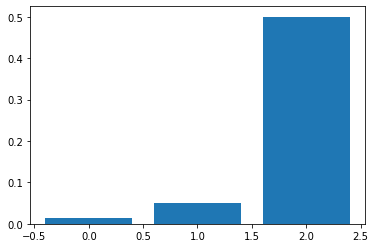

In [ ]:
from matplotlib import pyplot as plt
plt.bar(range(3), [evaluator.evaluate(predictionAndLabels), accuracy, 0.5])

Tập dữ liệu chứa r

### Đọc và xây dựng tập train

In [ ]:
rdd = sc.textFile('oxford_pet3_train_'+str(r)+'.csv')

def get_rows(row):
  return row.split(",")

rdd_sub = rdd.map(lambda row: get_rows(row))
list_vector_train = rdd_sub.collect()

In [ ]:
list_index_label_train = [i[:2] for i in list_vector_train] #lấy index và label
list_image_vector_train = [i[2:] for i in list_vector_train]#lấy vector ảnh

In [ ]:
for row in range(len(list_image_vector_train)):
  for col in range(len(list_image_vector_train[0])):
    list_image_vector_train[row][col] = float(list_image_vector_train[row][col])

In [ ]:
datalist = []

for row in range(len(list_image_vector_train)):
  datalist.append( [ float(list_index_label_train[row][1]) ] + list_image_vector_train[row] )

In [ ]:
datacolumn = ["label"]
datacolumn += [str(i) for i in range(len(list_image_vector_train[0]))]

In [ ]:
rdd = sc.parallelize( datalist )
train_df = rdd.toDF( schema=datacolumn )

In [ ]:
vecAssembler = VectorAssembler(inputCols=[str(i) for i in range(len(datacolumn) - 1) ], outputCol="features")
vec_train_df = vecAssembler.transform(train_df)

### Đọc và xây dựng tập test

In [ ]:
rdd = sc.textFile('oxford_pet3_test_'+str(r)+'.csv')

def get_rows(row):
  return row.split(",")

rdd_sub = rdd.map(lambda row: get_rows(row))
list_vector_test = rdd_sub.collect()

In [ ]:
list_index_label_test = [i[:2] for i in list_vector_test] #lấy index và label
list_image_vector_test = [i[2:] for i in list_vector_test]#lấy vector ảnh

In [ ]:
for row in range(len(list_image_vector_test)):
  for col in range(len(list_image_vector_test[0])):
    list_image_vector_test[row][col] = float(list_image_vector_test[row][col])

In [ ]:
datalist = []

for row in range(len(list_image_vector_test)):
  datalist.append( [ float(list_index_label_test[row][1]) ] + list_image_vector_test[row] )

In [ ]:
datacolumn = ["label"]
datacolumn += [str(i) for i in range(len(list_image_vector_test[0]))]

In [ ]:
rdd = sc.parallelize( datalist )
test_df = rdd.toDF( schema=datacolumn )

In [ ]:
vecAssembler = VectorAssembler(inputCols=[str(i) for i in range(len(datacolumn) - 1) ], outputCol="features")
vec_test_df = vecAssembler.transform(test_df)

### Xây dựng mô hình

In [ ]:
# input là số r
# output là số label 37 (classes)
layers = [r, 4, 2, 37]

# Xây dựng mô hình phân loại đa lớp
classifier  = MultilayerPerceptronClassifier(labelCol='label', featuresCol='features', maxIter=100, layers=layers, blockSize=128, seed=1234)

# Huấn luyện mô hình
model = classifier.fit(vec_train_df)

In [ ]:
# Dự đoán tập train
train_output_df = model.transform(vec_train_df)
train_predictionAndLabels = train_output_df.select('prediction', 'label')

In [ ]:
evaluator = MulticlassClassificationEvaluator(metricName='accuracy')
print('Độ chính xác (tập train) = ' + str(evaluator.evaluate(train_predictionAndLabels)))

In [ ]:
# Dự đoán tập test
test_output_df = model.transform(vec_test_df)
test_predictionAndLabels = test_output_df.select('prediction', 'label')

In [ ]:
evaluator = MulticlassClassificationEvaluator(metricName='accuracy')
print('Độ chính xác (tập test) = ' + str(evaluator.evaluate(test_predictionAndLabels)))

In [ ]:
# Vẽ biểu đồ
data = [evaluator.evaluate(train_predictionAndLabels), evaluator.evaluate(test_predictionAndLabels)]
plt.bar(["Tập train", "Tập test"], data, color='blue')
plt.show()